# 第4回レポート課題


提出物：

- report04.ipynb（このノートブック）
  - ノートブックに直接コードを書いて実行できる
  - コードを実行した結果の状態で保存して提出すること
- レポート
  - 形式：A4縦，PDFファイル1つ（複数ファイルやwordファイルは受け付けない）
  - 1ページ目冒頭に，氏名・学生番号・所属学科/分野/コース・授業名・課題名・出題授業日を明記すること
  - 各課題（「課題4-01」「課題4-02」など）を区別できるようにすること
  - 含める内容
    - コードの抜粋とその説明
    - 実行結果（テキスト出力，プロット等）とその説明
    - 各課題で指定された内容とその説明
  - レポート作成上の注意事項:
    - **レポートにはできるだけ丁寧な説明を含めること**



以降では以下の2つのデータをそれぞれ数値例1，数値例2と呼ぶ（以下のコードのテンプレート中に定義されている）．


- 数値例1：6点の$x$と$y$のペア
  - $(x_1,y_1) = (0,0)$
  - $(x_2,y_2) = (1.2566,0.9511)$
  - $(x_3,y_3) = (2.5133,0.5878)$
  - $(x_4,y_4) = (3.7699,-0.5878)$
  - $(x_4,y_4) = (5.0265,-0.9511)$
  - $(x_4,y_4) = (6.2832,0.0000)$
  - 

- 数値例2：10点の$x$と$y$のペア
  - $(x_1, y_1) = (0.0000, 2.0000)$
  - $(x_2, y_2) = (0.2000, 2.1000)$
  - $(x_3, y_3) = (0.4000, 1.6000)$
  - $(x_4, y_4) = (0.6000, 2.6000)$
  - $(x_5, y_5) = (0.8000, 1.5000)$
  - $(x_6, y_6) = (1.2000, 2.7000)$
  - $(x_7, y_7) = (1.4000, 0.6700)$
  - $(x_8, y_8) = (1.6000, 3.5000)$
  - $(x_9, y_9) = (1.8000, 0.9400)$
  - $(x_{10}, y_{10}) = (2.0000, 2.0000)$



## 課題4-01：最小二乗法


多項式関数による最小二乗法のプログラムを作成することを考える．


講義の計算小課題で，最小二乗法の最適性の条件として以下の微分を確認した:

$$
\begin{align*}
 \frac{\partial F}{\partial a_i} &= 
 \frac{\partial}{\partial a_i}
 \left\{
 \sum_{k = 1}^m \left( y_k - \sum_{j=0}^n a_j \varphi_j(x_k) \right)^2
 \right\}
 \\
 &
 =
 - 2 \sum_{k = 1}^m
 \left(
 y_k - \sum_{j=0}^n a_j \varphi_j(x_k)
 \right) \varphi_i(x_k) 
 \\
 &=
 2 \sum_{j=0}^n
 \left( { \sum_{k = 1}^m \varphi_j(x_k) \varphi_i(x_k) } \right) a_j
 - 2 
 \sum_{k = 1}^m { y_k \varphi_i(x_k) }.
\end{align*}
$$




この方程式を，微分する$a_i$の添字$i = 0$から$i = n$まで並べると以下のようになる:

$$
\begin{align*}	 
 \frac{\partial F}{\partial a_0} = 0\text{を変形} 
 \Rightarrow
 \sum_{j = 0}^n \left(
 { \sum_{k = 1}^m \varphi_{\red{j}}(x_k) \varphi_{\blue{0}}(x_k) } \right) a_j &= 
 \sum_{k = 1}^m { y_k \varphi_0(x_k) }
 \\
 \frac{\partial F}{\partial a_2} = 0\text{を変形} 
 \Rightarrow
 \sum_{j = 0}^n 
 \left(
 { \sum_{k = 1}^m \varphi_{\red{j}}(x_k) \varphi_{\blue{1}}(x_k) }
 \right) 
 a_j &= \sum_{k = 1}^m {y_k \varphi_1(x_k) }\\
 & \vdots 
 \\
 \frac{\partial F}{\partial a_n} = 0\text{を変形} 
 \Rightarrow
 \sum_{j = 0}^n 
 \left(
 {
 \sum_{k = 1}^m \varphi_{\red{j}}(x_k) \varphi_{\blue{n}}(x_k)
 }
 \right)
 a_j &= \sum_{k = 1}^m {y_k \varphi_n(x_k)}.
\end{align*}
$$


これは$a_0, \ldots, a_n$に関する$n+1$元連立方程式であり，行列形式で整理すると以下のように書くことができる:

$$
\begin{align*}
 \begin{split}  
 \begin{bmatrix}
  \sum_{k = 1}^m
  \varphi_{\red{0}}(x_k) \varphi_{\blue{0}}(x_k)  & 
  \sum_{k = 1}^m
  \varphi_{\red{1}}(x_k) \varphi_{\blue{0}}(x_k)  &
  \cdots & 
  \sum_{k = 1}^m
  \varphi_{\red{n}}(x_k) \varphi_{\blue{0}}(x_k)
  \\
   \vdots & \vdots & \cdots & \vdots
  \\
  \sum_{k = 1}^m
  \varphi_{\red{0}}(x_k) \varphi_{\blue{n}}(x_k) &
  \sum_{k = 1}^m
  \varphi_{\red{1}}(x_k) \varphi_{\blue{n}}(x_k) &
  \cdots &
  \sum_{k = 1}^m
  \varphi_{\red{n}}(x_k) \varphi_{\blue{n}}(x_k) 
 \end{bmatrix}
 \begin{bmatrix}
  a_0 \\
  a_1 \\
  \vdots \\
  a_n
 \end{bmatrix}
 \\ % -------------------------
 =
 \begin{bmatrix}
  \sum_{k = 1}^m y_k \varphi_0(x_k) \\
  \sum_{k = 1}^m y_k \varphi_1(x_k) \\
  \vdots \\
  \sum_{k = 1}^m y_k \varphi_n(x_k) 
 \end{bmatrix}
 \end{split}
 \tag{1}
\end{align*}
$$




ここで，$m \times (n+1)$行列
$$
\begin{align*}
        \boldsymbol{P} = 
        \begin{bmatrix}
         \varphi_0(x_1) & \varphi_1(x_1) & \ldots & \varphi_n(x_1)
         \\
         \varphi_0(x_2) & \varphi_1(x_2) & \ldots & \varphi_n(x_2)
         \\
         \vdots & \vdots & \ddots & \vdots 
         \\
         \varphi_0(x_m) & \varphi_1(x_m) & \ldots & \varphi_n(x_m)
        \end{bmatrix}
\end{align*}
$$
と，
$a_i (i = 0,\ldots,n)$を並べたベクトルを$\boldsymbol{a}$，$y_i (i = 0,\ldots,n)$を並べたベクトルを$\boldsymbol{y}$と定義すると，方程式(1)は以下のようにまとめることができる:
$$
\begin{align}
 % \boldsymbol{M} \boldsymbol{a} = \boldsymbol{y}.
 (\boldsymbol{P}^\top \boldsymbol{P}) \boldsymbol{a} = \boldsymbol{P}^\top \boldsymbol{y}.
\end{align}
\tag{2}
$$

**各自，式(1)と式(2)が一致することを確かめること**（行列同士の掛け算，行列とベクトルの掛け算の仕方をよく思い出すこと）．



以上を踏まえ，以下のステップに沿って最小二乗補間を作成せよ．

### 1.
行列$\boldsymbol{P}$を作成せよ（添字の動きに注意すること）．

基底関数$\varphi$はスライドで示した通り
$\varphi_0(x) = 1, \varphi_0(x) = x, \varphi_0(x) = x^2, \ldots, \varphi_n(x) = x^n$
とする．これは$\varphi_i(x) = x^i$として表現できる．

数値例1に対して，例えば$n=3$では$\boldsymbol{P}$は以下のようになる:

```python:
[[  1.           0.           0.           0.        ]
 [  1.           1.2566       1.57904356   1.98422614]
 [  1.           2.5133       6.31667689  15.87570403]
 [  1.           3.7699      14.21214601  53.57836924]
 [  1.           5.0265      25.26570225 126.99805236]
 [  1.           6.2832      39.47860224 248.05195359]] 
```
       
### 2.
$\boldsymbol{P}^\top \boldsymbol{P}$と$\boldsymbol{P}^\top \boldsymbol{y}$を計算せよ．
- ヒント: numpyで行列Aの転置を得るには`A.T`とする．

### 3.
連立方程式を解いて$\boldsymbol{a}$を求めよ．
- 連立方程式の計算にはnumpyの連立方程式を解く機能を用いること（自作の関数は用いない）．
- 前回の課題のサンプルを参照のこと．
       
### 4.
係数$\boldsymbol{a}$が得られると，補間した関数
$$
  g(x) = \sum_{i = 0}^n a_i \varphi_i(x)
  = \sum_{i = 0}^n a_i x^i
$$
を任意の$x$について計算することができるようになる．
変数`grid_x`に$x_0$から$x_m$の間を100等分した値を格納し，これに対し$g(x)$を計算せよ．






以下のコードを実行すると，与えられた点$x, y$から補間された$g(x)$を計算し，プロットする．

- レポートに含める内容:
  - 数値例1で$n = 1, 3, 5$としたときの解$a_1, \ldots, a_n$と，その時のプロット図
  - 式(1)と式(2)が一致することを確かめた手計算


In [6]:
import numpy as np


# 数値例1
x = np.array([0, 1.2566, 2.5133, 3.7699, 5.0265, 6.2832])
y = np.array([0, 0.9511, 0.5878, -0.5878, -0.9511, 0.0000])

# # 数値例2
# x = np.array([
#     0.0000, 0.2000, 0.4000, 0.6000, 0.8000, 
#     1.2000, 1.4000, 1.6000, 1.8000, 2.0000])
# y = np.array([
#     2.0000, 2.1000, 1.6000, 2.6000, 1.5000, 
#     2.7000, 0.6700, 3.5000, 0.9400, 2.0000])



m = len(x)
n = 3  # 多項式の最大次数




# --------------------------------------------------
# 1. Pを設定するコードをここに作成
# ヒント：xのy乗の計算はpythonでは「x ** y」と書く
# --------------------------------------------------

P = np.zeros((m, n + 1))

for i in range(m):
    for j in range(n+1):
        P[i, j] = 0  # これはダミーです


print("P:")
print(P)





# --------------------------------------------------
# 2. P^T P と P^T y を定義するコードをここに作成
# --------------------------------------------------

# Pの転置(transpose) x P
PtP = 0  # これはダミーです

print("P^T P:")
print(PtP)

# Pの転置(transpose) x y
PtY = 0  # これはダミーです

print("PtY: ")
print(PtY)




# --------------------------------------------------
# 3. 連立方程式を解いてaを求めるコードを作成
# --------------------------------------------------

# 求める係数
a = np.zeros(m)  # これはダミーです

print("a: ")
print(a)


# --------------------------------------------------
# 4. 配列aとxに対してg(x)計算するコードをここに作成
# --------------------------------------------------
def g_func(a, x):
    gx = 0
    for i in range(len(a)):
        gx += 0  # これはダミーです 
    return gx

# xの値を格納するベクトル
x_list = np.linspace(x.min(), x.max(), 100)
# g(x)の値を格納するベクトル
g_list = np.zeros_like(x_list)

for i in range(len(x_list)):
    g_list[i] = g_func(a, x_list[i])




P:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
P^T P:
0
PtY: 
0
-- Least-squares interpolation --
Points: 
x =  [0.     1.2566 2.5133 3.7699 5.0265 6.2832]
y =  [ 0.      0.9511  0.5878 -0.5878 -0.9511  0.    ]
Result: 
g(x) =  0.0 + 0.0 x^1 + 0.0 x^2 + 0.0 x^3



Text(0, 0.5, 'g(x)')

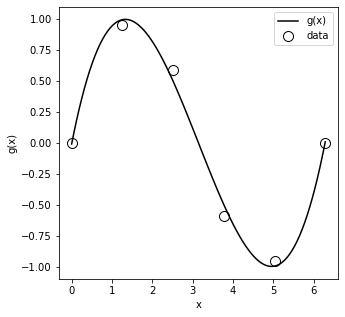

In [70]:
#
# 出力と保存（以下編集不要）
#

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams["savefig.bbox"] = 'tight'

fig, ax = plt.subplots(figsize=(5, 5))
# ax.axis('equal')


plt.scatter(
    x, y,  # データ
    s=100,  # マーカーサイズ
    c='w',  # マーカーの塗りつぶし色．wはwhite
    edgecolors='k',  # マーカーの線の色．kはblack
    label='data'  # 凡例用のラベル
)

# x, g(x)をプロット
plt.plot(x_list, g_list, label="$g(x)$", c='k')


plt.legend()
plt.xlabel("$x$")
plt.ylabel("$g(x)$")


# プロットを保存
plt.savefig('fig_report04-01.pdf')
plt.savefig('fig_report04-01.png')
plt.savefig('fig_report04-01.jpg')
plt.savefig('fig_report04-01.svg')

## 課題04-02：ラグランジュ補間


以下のコードをもとにラグランジュ補間を行うプログラムを作成せよ．

補間する$x$に対して$P(x)$を計算する部分はすでに記載されているが，$\varphi_i(x)$を計算する関数が空欄になっているため適切な結果が出るように埋めよ．

- レポートに含める内容: 数値例1と数値例2での実行結果の図


In [9]:
# ヒント：変数のiとjが一致する・しない場合

for i in range(5):
    for j in range(5):
        if i == j:
            print("[{},{}]".format(i, j), end="")
        else:
            print(" {},{} ".format(i, j), end="")
    print()

print("=====")

for i in range(5):
    for j in range(5):
        if i is not j:
            print("[{},{}]".format(i, j), end="")
        else:
            print(" {},{} ".format(i, j), end="")
    print()


[0,0] 0,1  0,2  0,3  0,4 
 1,0 [1,1] 1,2  1,3  1,4 
 2,0  2,1 [2,2] 2,3  2,4 
 3,0  3,1  3,2 [3,3] 3,4 
 4,0  4,1  4,2  4,3 [4,4]
=====
 0,0 [0,1][0,2][0,3][0,4]
[1,0] 1,1 [1,2][1,3][1,4]
[2,0][2,1] 2,2 [2,3][2,4]
[3,0][3,1][3,2] 3,3 [3,4]
[4,0][4,1][4,2][4,3] 4,4 


In [ ]:
import numpy as np

# # 数値例1
# x = np.array([0, 1.2566, 2.5133, 3.7699, 5.0265, 6.2832])
# y = np.array([0, 0.9511, 0.5878, -0.5878, -0.9511, 0.0000])

# 数値例2
x = np.array([
    0.0000, 0.2000, 0.4000, 0.6000, 0.8000, 
    1.2000, 1.4000, 1.6000, 1.8000, 2.0000])
y = np.array([
    2.0000, 2.1000, 1.6000, 2.6000, 1.5000, 
    2.7000, 0.6700, 3.5000, 0.9400, 2.0000])



def calc_psi(x_new, i, x):
    """phi_i(x)を計算する関数

    Args:
        x_new (double): 補間する関数値を計算するx
        i (int): 関数Phi_iの添字
        x (ndarray): 事前に与えられている点 x_0, ..., x_m

    Returns:
        _double: phi_i(x_new)
    """

    psi = 1

    for j in range(len(x)):
        # --------------------------------------------------
        # この部分のコードを作成
        # --------------------------------------------------
        # j と i が一致する場合に注意

        psi = 0  # これはダミーです

    return psi






# --------------------------------------------------
# 配列xとyに対してP(x_new)計算するコードをここに作成
# --------------------------------------------------
def P_func(x, y, x_new):
    P = 0
    for i in range(len(x)):
        P += 0  # これはダミーです
    return P



# xの値を格納するベクトル
x_list = np.linspace(x.min(), x.max(), 100)
# P(x)の値を格納するベクトル
P_list = np.zeros_like(x_list)

for i in range(len(x_list)):
    P_list[i] = P_func(x, y, x_list[i])


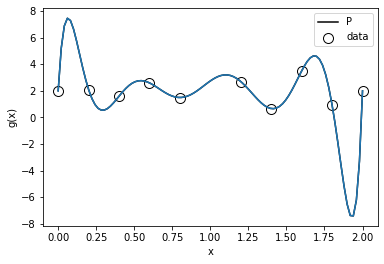

In [85]:
#
# 出力と保存（以下編集不要）
#

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams["savefig.bbox"] = 'tight'

fig, ax = plt.subplots(figsize=(5, 5))
# ax.axis('equal')


plt.scatter(
    x, y,  # データ
    s=100,  # マーカーサイズ
    c='w',  # マーカーの塗りつぶし色．wはwhite
    edgecolors='k',  # マーカーの線の色．kはblack
    label='data'  # 凡例用のラベル
)

# x, P(x)をプロット
plt.plot(x_list, P_list, label="$P(x)$", c='k')


plt.legend()
plt.xlabel("$x$")
plt.ylabel("$P(x)$")


# プロットを保存
plt.savefig('fig_report04-02.pdf')
plt.savefig('fig_report04-02.png')
plt.savefig('fig_report04-02.jpg')
plt.savefig('fig_report04-02.svg')


## 課題04-03：スプライン補間

以下のコードは数値例2に対して三次スプライン補間を行うプログラムである．

ここではスプラインの係数$a_j, b_j, c_j, d_j$を計算する部分はすでに用意されている．

関数`calc_g`は点`x_new`に対して，スプライン補間した値を計算する関数である．

この関数を完成させ，`g`に補間された値が正しく設定されるようにせよ．

この関数は与えられてる点の$x$を引数にとっているが，これは昇順にソートされているとみなしてよいこととする．


- レポートに含める内容:
  - 補間点に対して$g(x)$を計算しプロットした図．
  - 数値例2と，それ以外に$x$と$y$を自分で変えて得られた結果を2通り以上．


In [82]:
import numpy as np


def calc_g(x_new, x, a, b, c, d):
    """補間g(x)を計算する関数
    Args:
        x_new (float): 補間関数を計算したいxのスカラー値
        x (ndarray): m+1個のデータ点 (昇順にソートされていると仮定)
        a (float): m次元係数ベクトル
        b (float): m次元係数ベクトル
        c (float): m次元係数ベクトル
        d (float): m次元係数ベクトル

    Returns:
        float: g(x)
    """

    # 範囲外はNaNに
    if x_new < x[0] or x_new > x[-1]:
        return np.nan

    m = len(x) - 1  # 点の数はm+1個

    # j番目の区間の補間関数g_j(x)を計算したい

    # 計算したいx_newに対して補間関数の区間の添字jは以下のように決まる
    # (スライド: 「スプライン補間式の定義」参照)
    #
    # x0 <= x_new <= x1  なら j = 0
    # x1 <  x_new <= x2  なら j = 1
    #            ...
    # x_m-1 < x_new <= x_m   なら j = m-1

    # --------------------------------------------------
    #  ここに上の規則に従ってjを設定するコードを作成
    # --------------------------------------------------
   


    # --------------------------------------------------
    # ここにg_j(x)を計算する式を作成
    # --------------------------------------------------

    gx = 0  # これはダミーです



    return gx





#
# スプライン補間の係数計算（編集不要）
#
def spline(x, y):

    m = len(x) - 1

    h = np.zeros(m)
    for i in range(m):
        h[i] = x[i + 1] - x[i]

    v = np.zeros(m - 1)
    for i in range(1, m):
        v[i - 1] = 6 * (
             (y[i+1] - y[i]) / h[i] - (y[i] - y[i-1]) / h[i - 1])

    
    Z = np.zeros((m - 1, m - 1))
    Z[0, 0] = 2 * (h[0] + h[1])
    Z[0, 1] = h[1]
    for i in range(1, m - 2):
        Z[i, i - 1] = h[i]
        Z[i, i] = 2 * (h[i] + h[i + 1])
        Z[i, i + 1] = h[i + 1]

    Z[m - 2, m - 3] = h[m - 2]
    Z[m - 2, m - 2] = 2 * (h[m - 2] + h[m - 1])

    u_temp = np.linalg.solve(Z, v)
    u = np.zeros(len(u_temp) + 2)

    for i in range(1, len(u) - 1):
       u[i] = u_temp[i - 1]


    a = np.zeros(m)
    b = np.zeros(m)
    c = np.zeros(m)
    d = np.zeros(m)
    for i in range(m):
        a[i] = (u[i + 1] - u[i]) / (6 * (x[i + 1] - x[i]))
        b[i] = u[i] / 2
        d[i] = y[i]
        c[i] = (
            y[i + 1] \
            - a[i] * (x[i + 1] - x[i]) ** 3 \
            - b[i] * (x[i + 1] - x[i]) ** 2 \
            - d[i]
            ) / (x[i + 1] - x[i])

    return a, b, c, d





# データ
x = np.array([
    0.0000, 0.2000, 0.4000, 0.6000, 0.8000,
    1.2000, 1.4000, 1.6000, 1.8000, 2.0000])
y = np.array([
    2.0000, 2.1000, 1.6000, 2.6000, 1.5000,
    2.7000, 0.6700, 3.5000, 0.9400, 2.0000])
m = len(x)

# 補間するx
grid_x = np.linspace(x.min(), x.max(), 100)

#
# splineの係数を計算する関数
#
a, b, c, d = spline(x, y)

print("Coefficient of spline interpolation: ")
print("a = ", a)
print("b = ", b)
print("c = ", c)
print("d = ", d)

#
# 補間値g(x)を計算
#
g = np.zeros_like(grid_x)
for grid_idx in range(len(grid_x)):
    g[grid_idx] = calc_g(grid_x[grid_idx], x, a, b, c, d)



Coefficient of spline interpolation: 
a =  [ -39.90286971  124.51434854 -195.65452446  208.1037493  -113.23564593
  383.00271003 -531.050021    459.94737395 -182.48947479]
b =  [   0.          -23.94172183   50.7668873   -66.62582738   58.2364222
  -77.64635292  152.1552731  -166.47473949  109.49368487]
c =  [ 2.09611479 -2.69222958  2.67280352 -0.4989845  -2.17686553 -9.94083782
  4.96094622  2.09705294 -9.29915798]
d =  [2.   2.1  1.6  2.6  1.5  2.7  0.67 3.5  0.94]


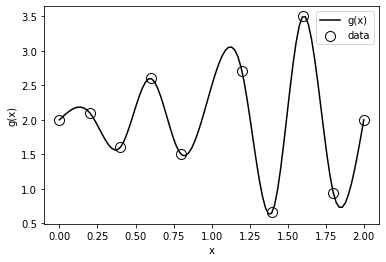

In [84]:
#
# 出力と保存（以下編集不要）
#

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams["savefig.bbox"] = 'tight'

fig, ax = plt.subplots(figsize=(5, 5))
# ax.axis('equal')


plt.scatter(
    x, y,  # データ
    s=100,  # マーカーサイズ
    c='w',  # マーカーの塗りつぶし色．wはwhite
    edgecolors='k',  # マーカーの線の色．kはblack
    label='data'  # 凡例用のラベル
)

# x, g(x)をプロット
plt.plot(x_list, g_list, label="$g(x)$", c='k')


plt.legend()
plt.xlabel("$x$")
plt.ylabel("$g(x)$")

# プロットを保存
plt.savefig('fig_report04-03.pdf')
plt.savefig('fig_report04-03.png')
plt.savefig('fig_report04-03.jpg')
plt.savefig('fig_report04-03.svg')
